In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("polynomial_regression.csv")
ds.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


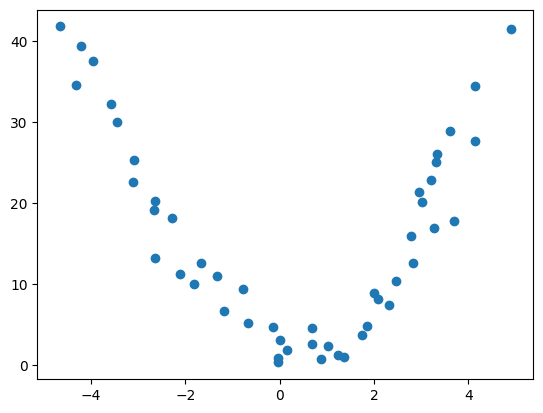

In [3]:
plt.scatter(ds["Temperature (°C)"],ds["Ice Cream Sales (units)"])
plt.show()

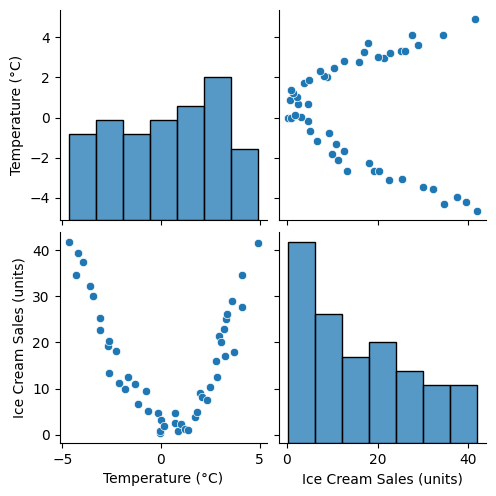

In [4]:
sns.pairplot(data=ds)
plt.show()

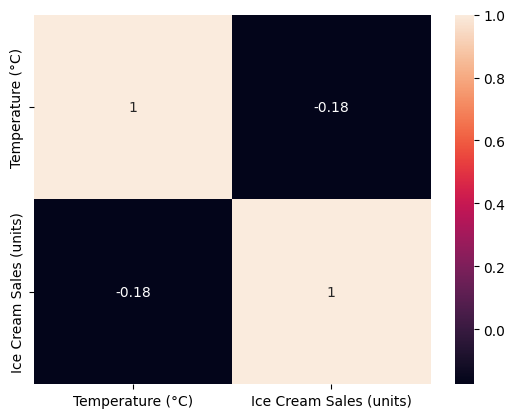

In [5]:
sns.heatmap(data=ds.corr(),annot=True)
plt.show()

In [6]:
ds.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In [7]:
x = ds[["Temperature (°C)"]]
y = ds["Ice Cream Sales (units)"]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
lr.score(x_test,y_test)*100

86.9722394296994

In [16]:
z = lr.predict(x)

In [19]:
lr.coef_

array([ 0.        , -0.65035708,  1.85398314])

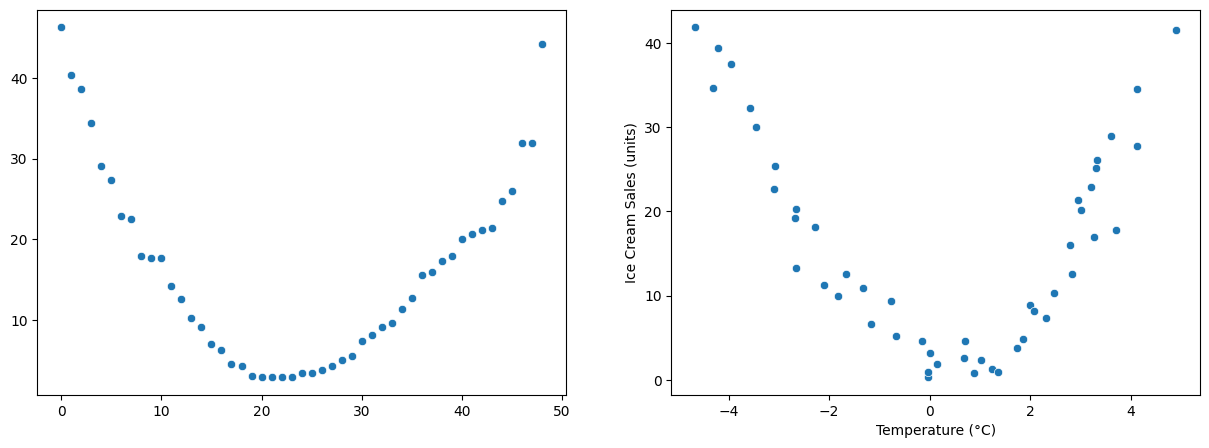

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(z)

plt.subplot(1,2,2)
sns.scatterplot(data=ds,x=ds["Temperature (°C)"],y=ds["Ice Cream Sales (units)"])
plt.show()

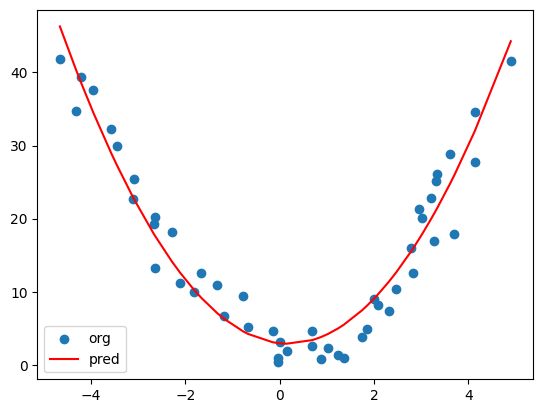

In [18]:
plt.scatter(ds["Temperature (°C)"],ds["Ice Cream Sales (units)"])
plt.plot(ds["Temperature (°C)"],z,c="red")
plt.legend(["org","pred"])
plt.show()